<a href="https://colab.research.google.com/github/otavioolimpio/Python/blob/main/rede_neural_artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,8)

#Criar o dataset

In [67]:
def get_linear_curve(x, w, b=0, noise_scale=0):
  return w*x + b + noise_scale*np.random.randn(x.shape[0])

In [68]:
x = np.arange(-10, 30.1, 0.5)
Y = get_linear_curve(x, 1.8, 32, noise_scale=2.5)

In [69]:
x.shape, Y.shape

((81,), (81,))

Text(0, 0.5, 'ºF')

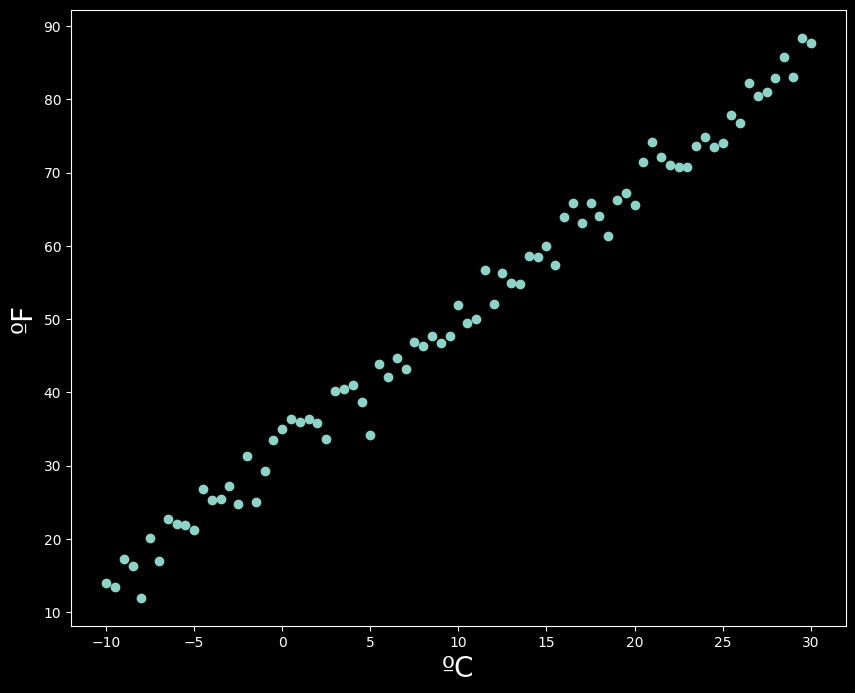

In [70]:
plt.scatter(x, Y)
plt.xlabel('ºC', fontsize=20)
plt.ylabel('ºF', fontsize=20)

#Modelo
- Inicializar os pesos
- Feedforward
- Calcular a perda
- Backpropagation

In [71]:
# Inicializar
w = np.random.rand(1)
b = 0

In [72]:
def forward(input, w, b):
  return w*input + b

In [73]:
def mse(Y, y):
  return (Y-y)**2

In [74]:
def backpropagation(inputs, outputs, targets, w, b, lr):
  dw = lr*(-2*inputs*(targets-outputs)).mean()
  db = lr*(-2*(targets-outputs)).mean()
  w -= dw
  b -= db
  return w, b

In [75]:
def model_fit(inputs, targets, w, b, epochs = 200, lr = 0.001):
  for epoch in range(epochs):
    outputs = forward(inputs, w, b)
    loss = np.mean(mse(outputs, targets))
    w, b = backpropagation(inputs, outputs, targets, w, b, lr)

    if (epoch+1)%50 == 0:
      print(f'Epoch: [{epoch+1}/{epochs}], Loss: {loss:.4f}')
  return w, b

In [76]:
x = np.arange(-10, 30, 2)
Y = get_linear_curve(x, 1.8, 32)

In [77]:
# Inicialização

w = np.random.rand(1)
b = np.zeros(1)

In [80]:
w, b = model_fit(x, Y, w, b, epochs = 1000, lr = 0.002)
print(f'w: {w[0]:.3f}, b: {b[0]:.3f}')

Epoch: [50/1000], Loss: 3.4457
Epoch: [100/1000], Loss: 2.6877
Epoch: [150/1000], Loss: 2.0964
Epoch: [200/1000], Loss: 1.6352
Epoch: [250/1000], Loss: 1.2754
Epoch: [300/1000], Loss: 0.9948
Epoch: [350/1000], Loss: 0.7760
Epoch: [400/1000], Loss: 0.6052
Epoch: [450/1000], Loss: 0.4721
Epoch: [500/1000], Loss: 0.3682
Epoch: [550/1000], Loss: 0.2872
Epoch: [600/1000], Loss: 0.2240
Epoch: [650/1000], Loss: 0.1747
Epoch: [700/1000], Loss: 0.1363
Epoch: [750/1000], Loss: 0.1063
Epoch: [800/1000], Loss: 0.0829
Epoch: [850/1000], Loss: 0.0647
Epoch: [900/1000], Loss: 0.0504
Epoch: [950/1000], Loss: 0.0394
Epoch: [1000/1000], Loss: 0.0307
w: 1.809, b: 31.778


Text(0, 0.5, 'ºF')

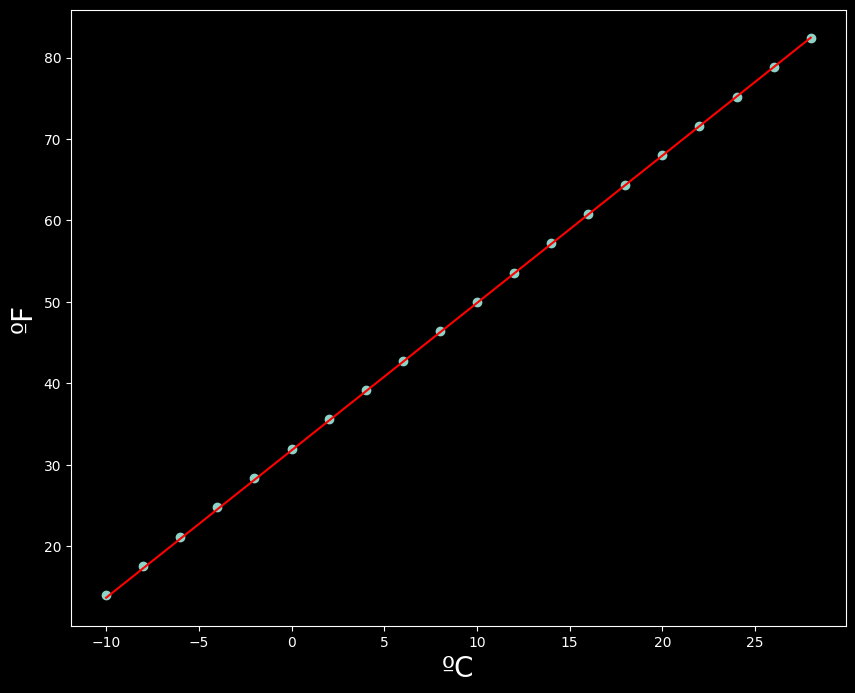

In [81]:
plt.scatter(x, Y)
plt.plot(x, get_linear_curve(x, w, b), color='red')
plt.xlabel('ºC', fontsize=20)
plt.ylabel('ºF', fontsize=20)